<a href="https://colab.research.google.com/github/anmolpal2001/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'sample_data']


In [3]:
heart_data = pd.read_csv("/content/heart.csv")

In [4]:
type(heart_data)

pandas.core.frame.DataFrame

In [5]:
heart_data.shape

(1025, 14)

In [6]:
# print first 5 rows of the data set
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
# statistical measures about the data suxh as standard deviation etc
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking .

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity.

Note that thalassemia, one of the variables in this dataset, is heredity.

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes.

Other factors include stress, alcohol and poor diet/nutrition.

In [10]:
heart_data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
899,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
699,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
662,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
831,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
65,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0


from matplotlib import pyplot as plt
_df_32['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['chol'].plot(kind='hist', bins=20, title='chol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='age', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='chol', y='restecg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['trestbps']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('trestbps')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['chol']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('chol')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['sex']
  ys = series['restecg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('sex', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('sex')
_ = plt.ylabel('restecg')

from matplotlib import pyplot as plt
_df_44['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['chol'].plot(kind='line', figsize=(8, 4), title='chol')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
heart_data.isnull().sum().sum()

0

So, we have no missing vaues

In [13]:
print(heart_data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

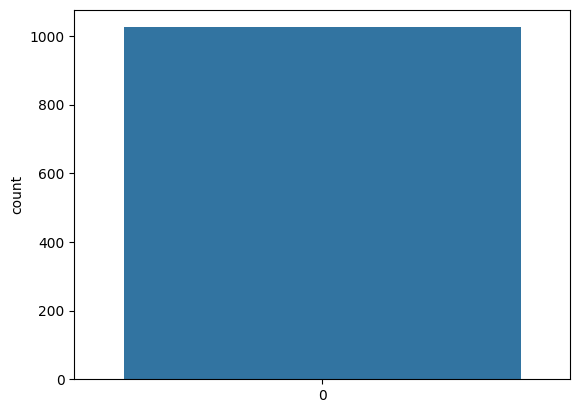

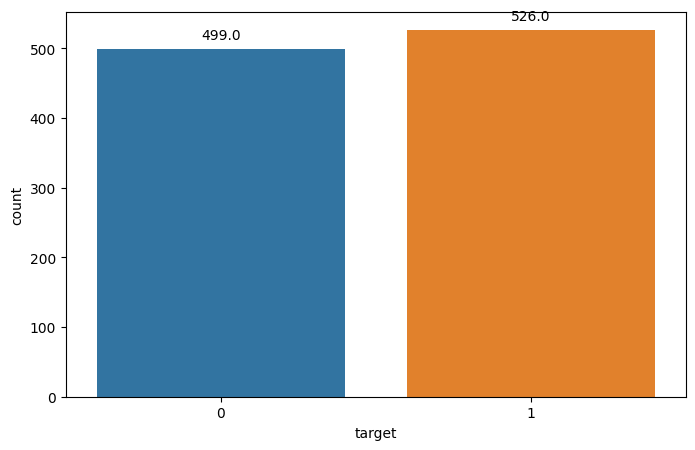

1    526
0    499
Name: target, dtype: int64


In [15]:
y = heart_data["target"]

sns.countplot(y)

target_temp = heart_data.target.value_counts()

# Plotting additional details for each unique value
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed
ax = sns.countplot(x="target", data=heart_data)

# Annotating the plot with count details
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Displaying the plot
plt.show()


print(target_temp)

# Percentage of patient with or without heart problems in the given dataset

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/1025,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/1025,2)))

Percentage of patience without heart problems: 48.68
Percentage of patience with heart problems: 51.32


In [17]:
heart_data["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

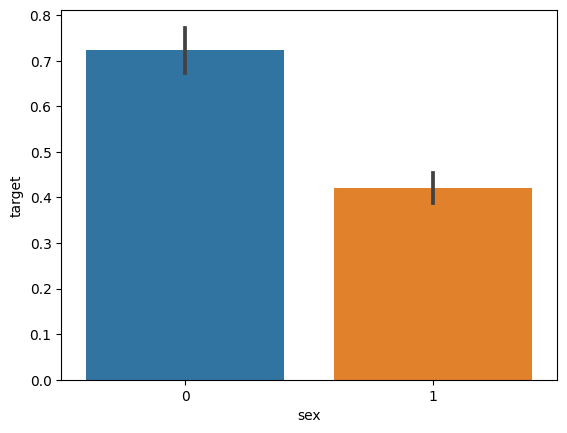

In [18]:
sns.barplot(x=heart_data["sex"], y=y)

### Here 0 is female and 1 is male patients

In [19]:
countFemale = len(heart_data[heart_data.sex == 0])
countMale = len(heart_data[heart_data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(heart_data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(heart_data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


# Heart Disease Frequency for ages

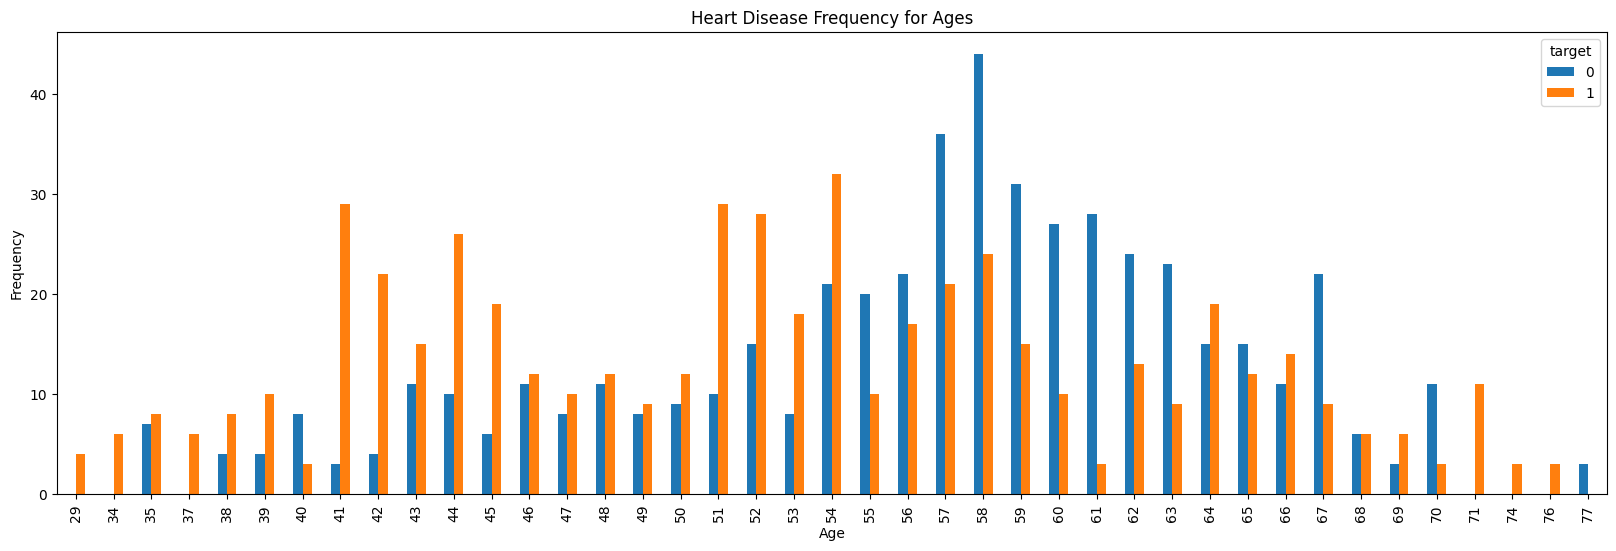

In [20]:
pd.crosstab(heart_data.age,heart_data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

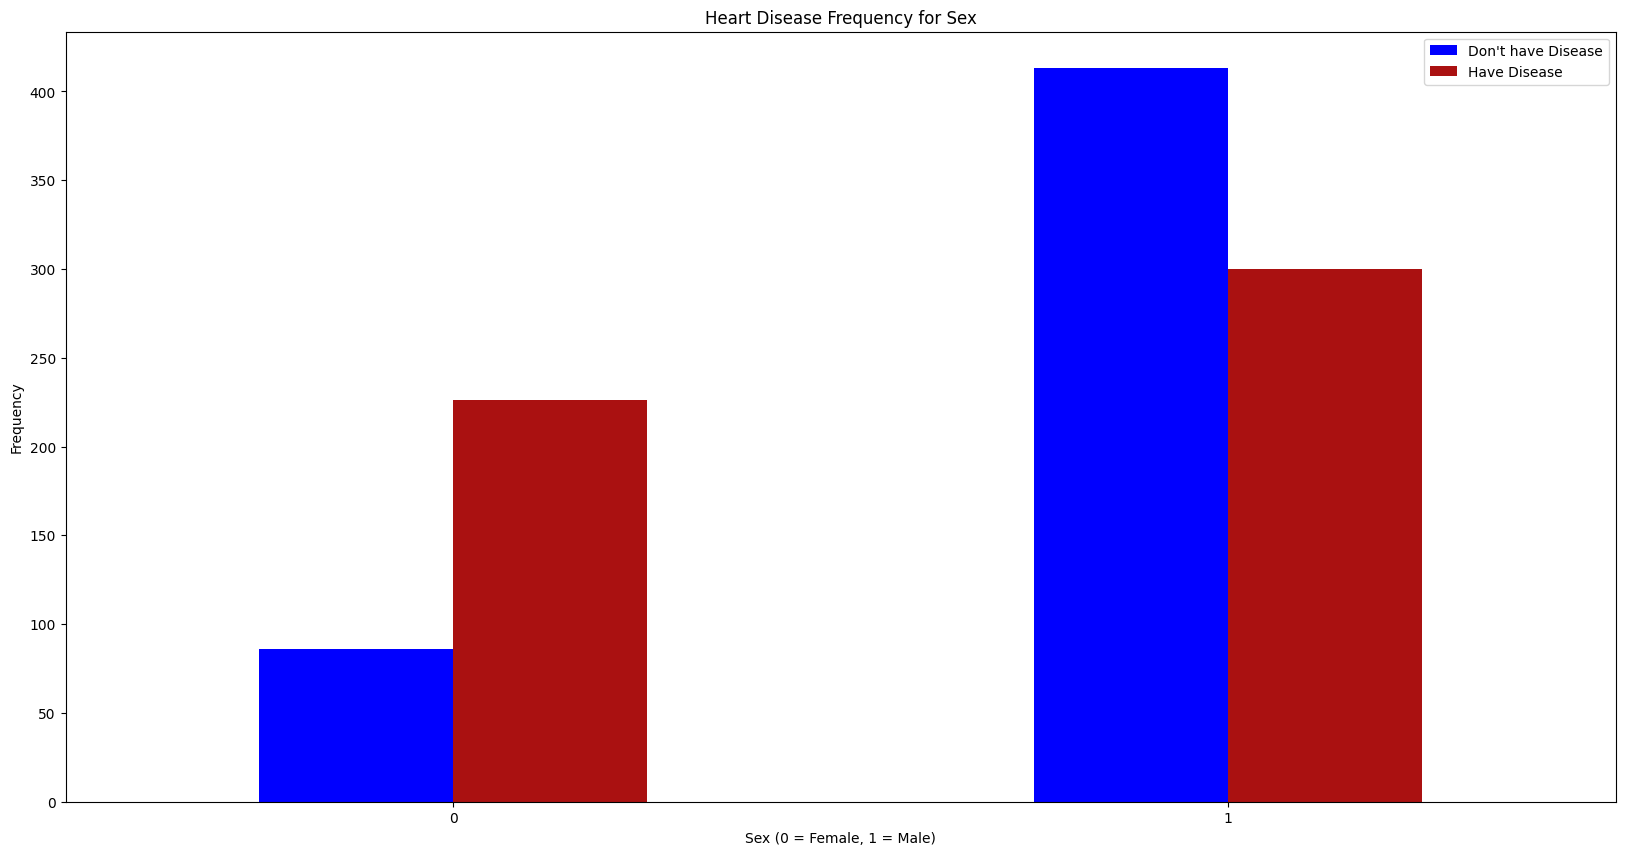

In [21]:
pd.crosstab(heart_data.sex,heart_data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [22]:
heart_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

# Heart disease according to Fasting Blood sugar

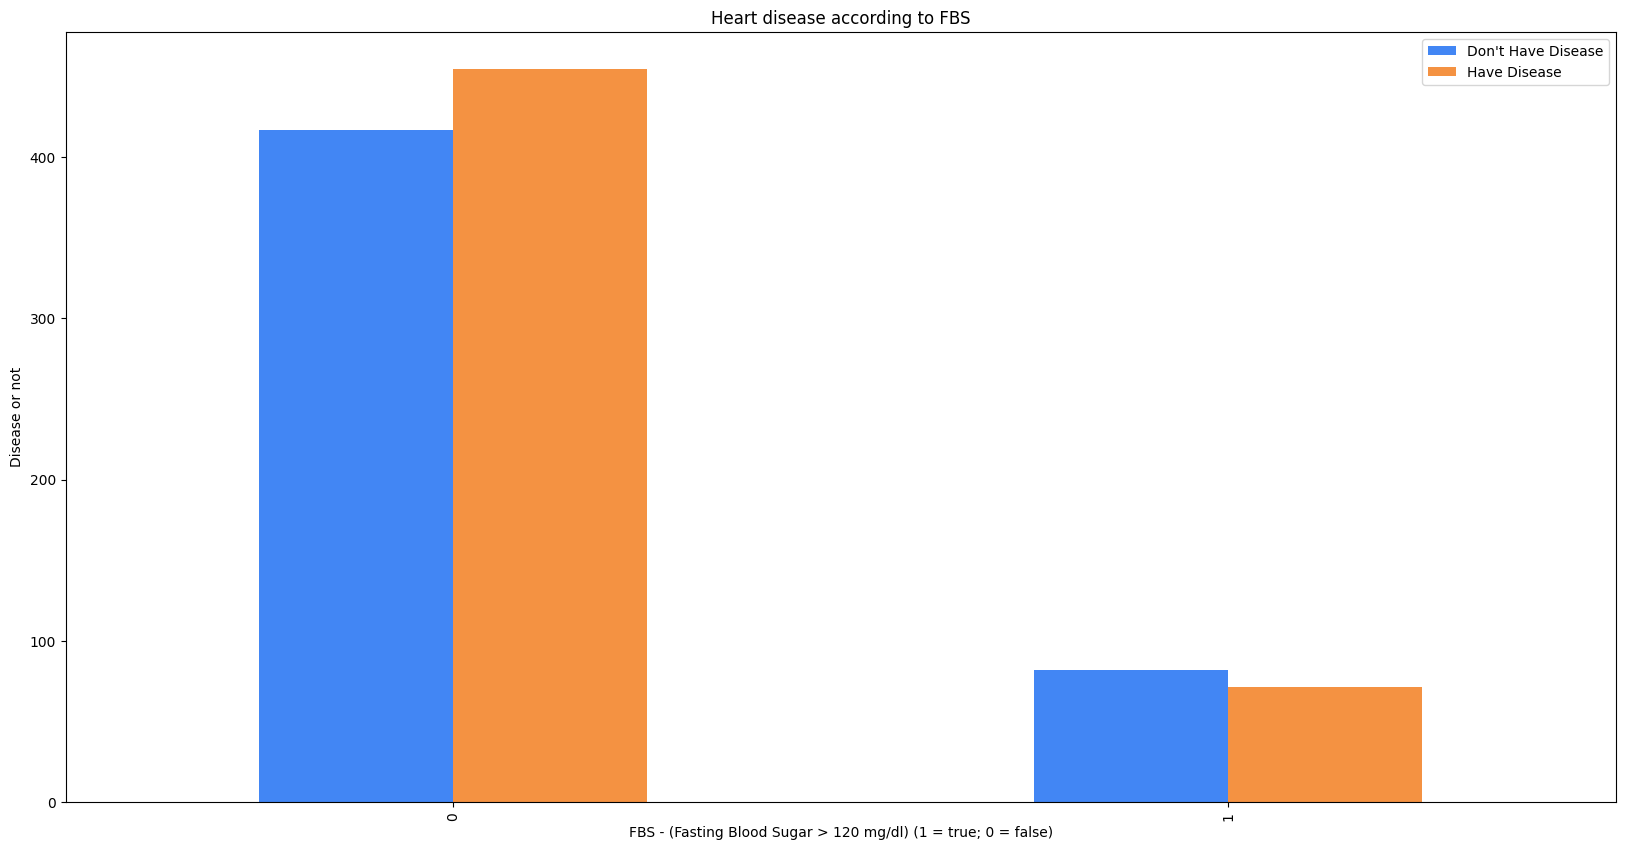

In [23]:
pd.crosstab(heart_data['fasting_blood_sugar'], heart_data['target']).plot(kind="bar", figsize=(20,10), color=['#4286f4', '#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [24]:
heart_data['chest_pain_type'].unique()

array([0, 1, 2, 3])

<Axes: xlabel='chest_pain_type', ylabel='target'>

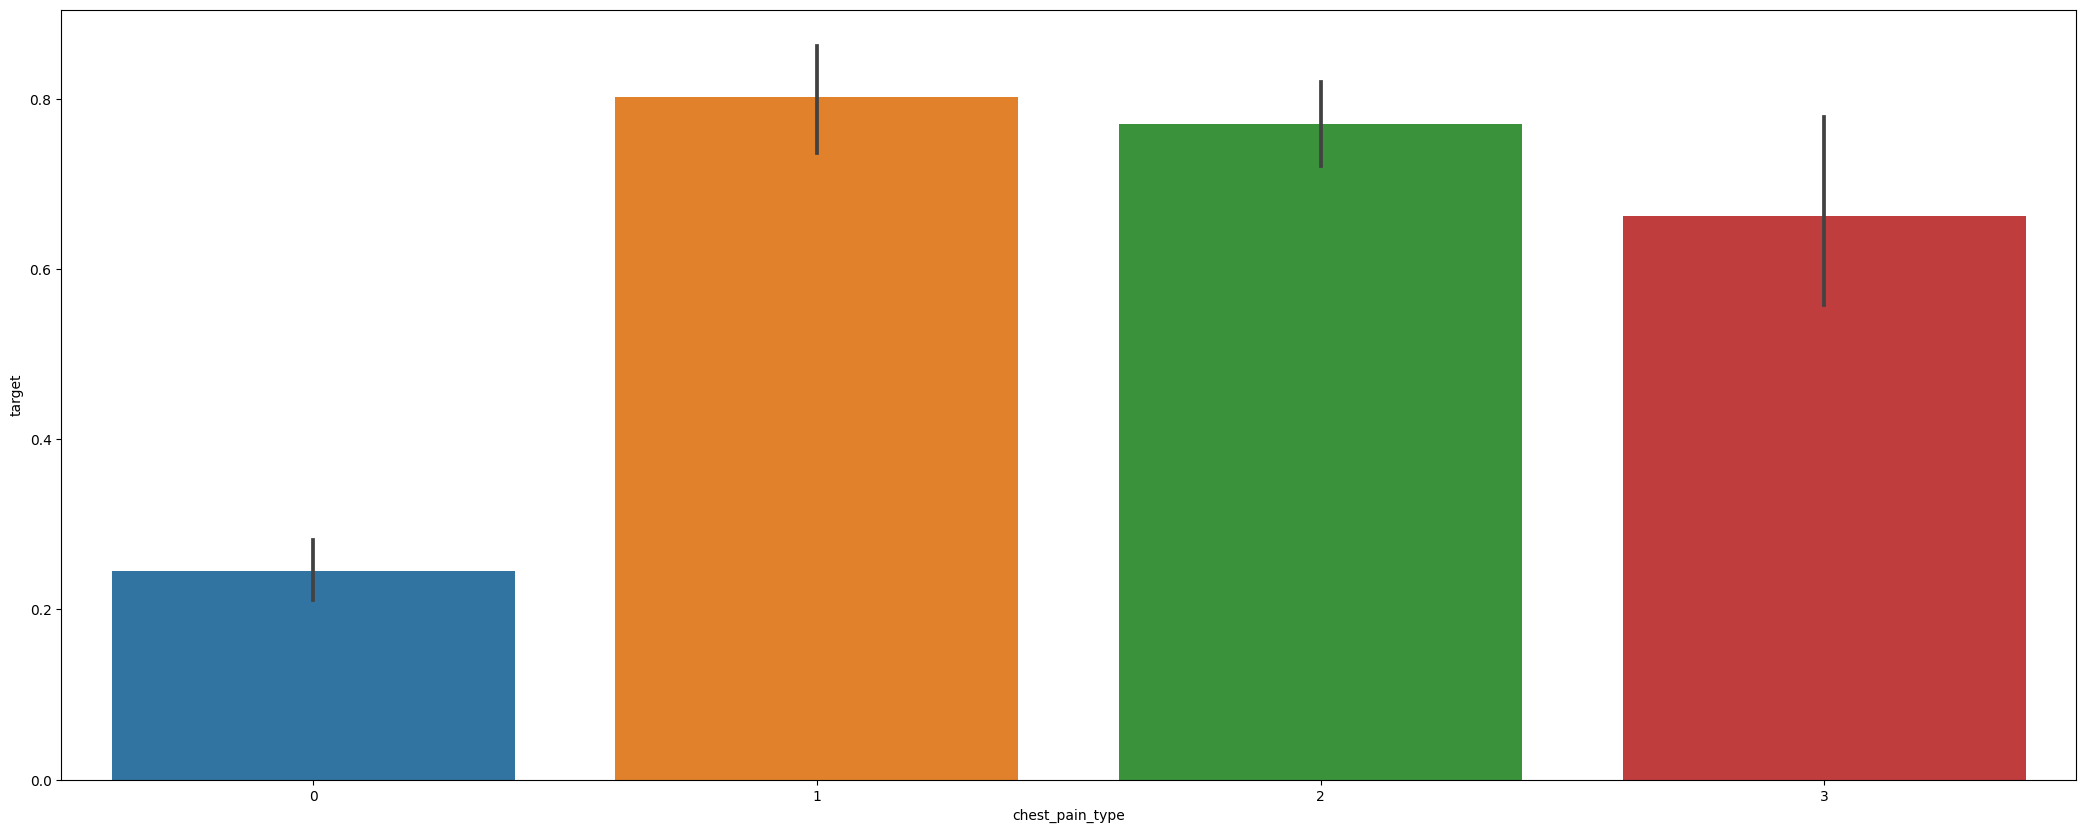

In [25]:
plt.figure(figsize=(26, 10))
sns.barplot(x=heart_data["chest_pain_type"], y=y)

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [26]:
heart_data['resting_blood_pressure'].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

<Axes: xlabel='resting_blood_pressure', ylabel='target'>

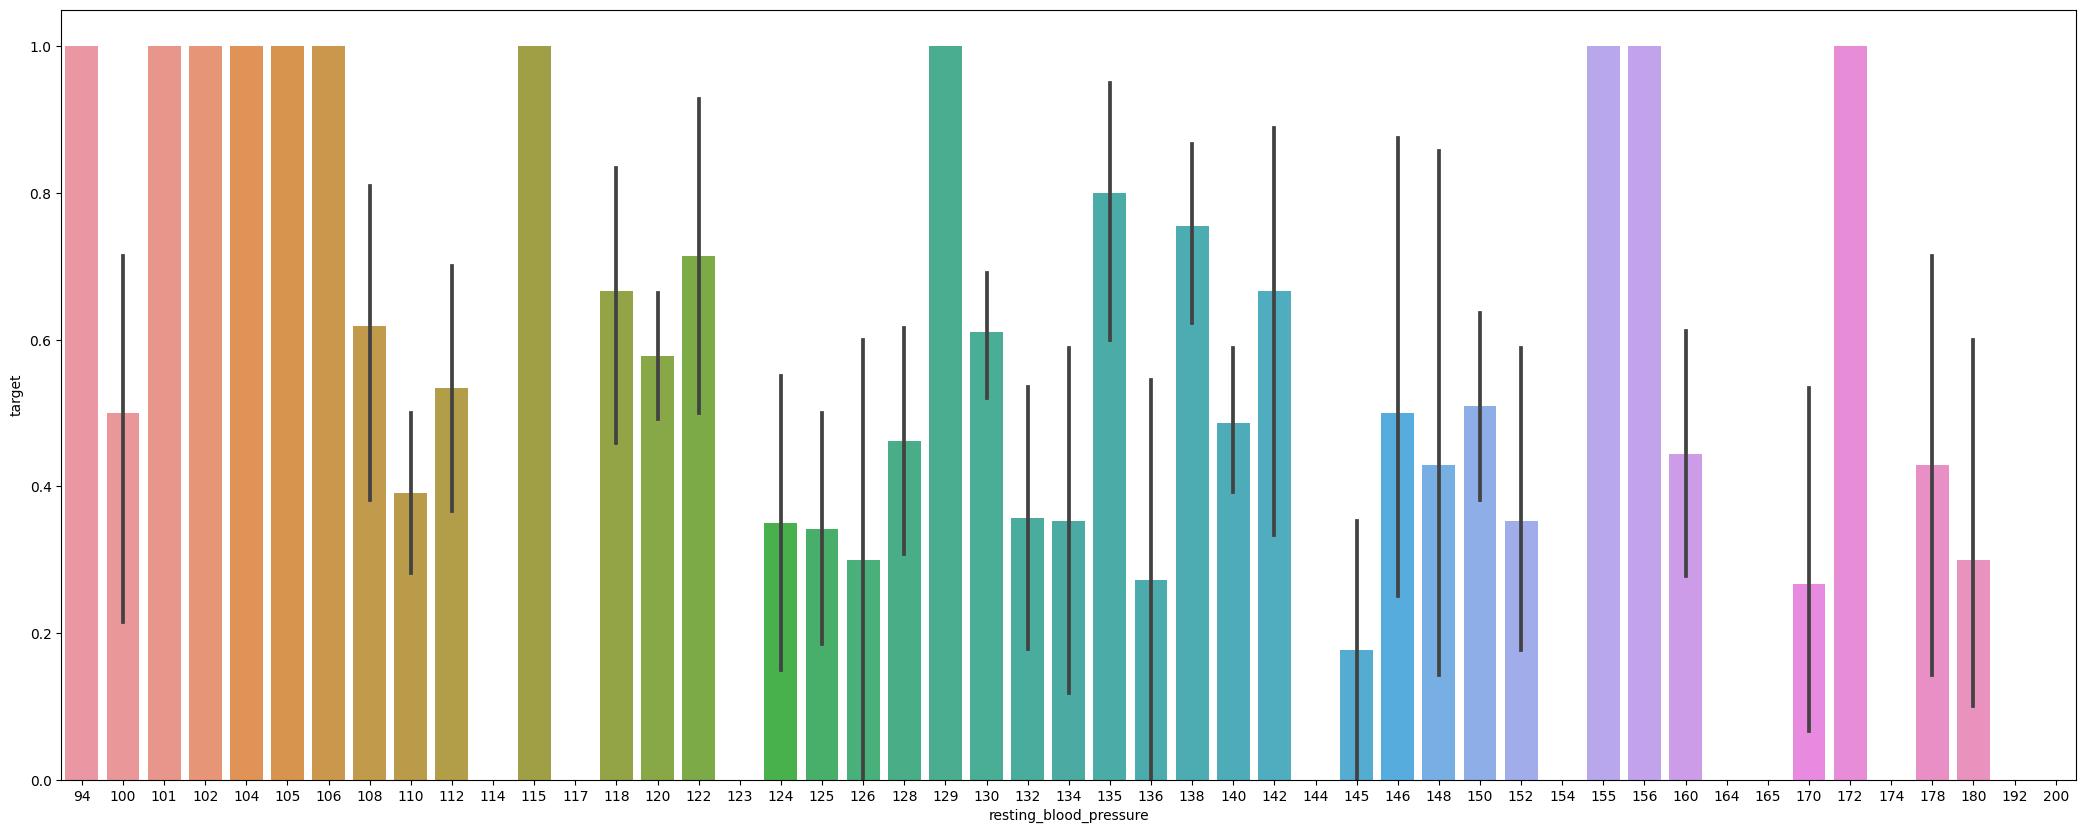

In [27]:
plt.figure(figsize=(26, 10))
sns.barplot(x=heart_data['resting_blood_pressure'],y=y)

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [28]:
heart_data['rest_ecg'].unique()

array([1, 0, 2])

<Axes: xlabel='rest_ecg', ylabel='target'>

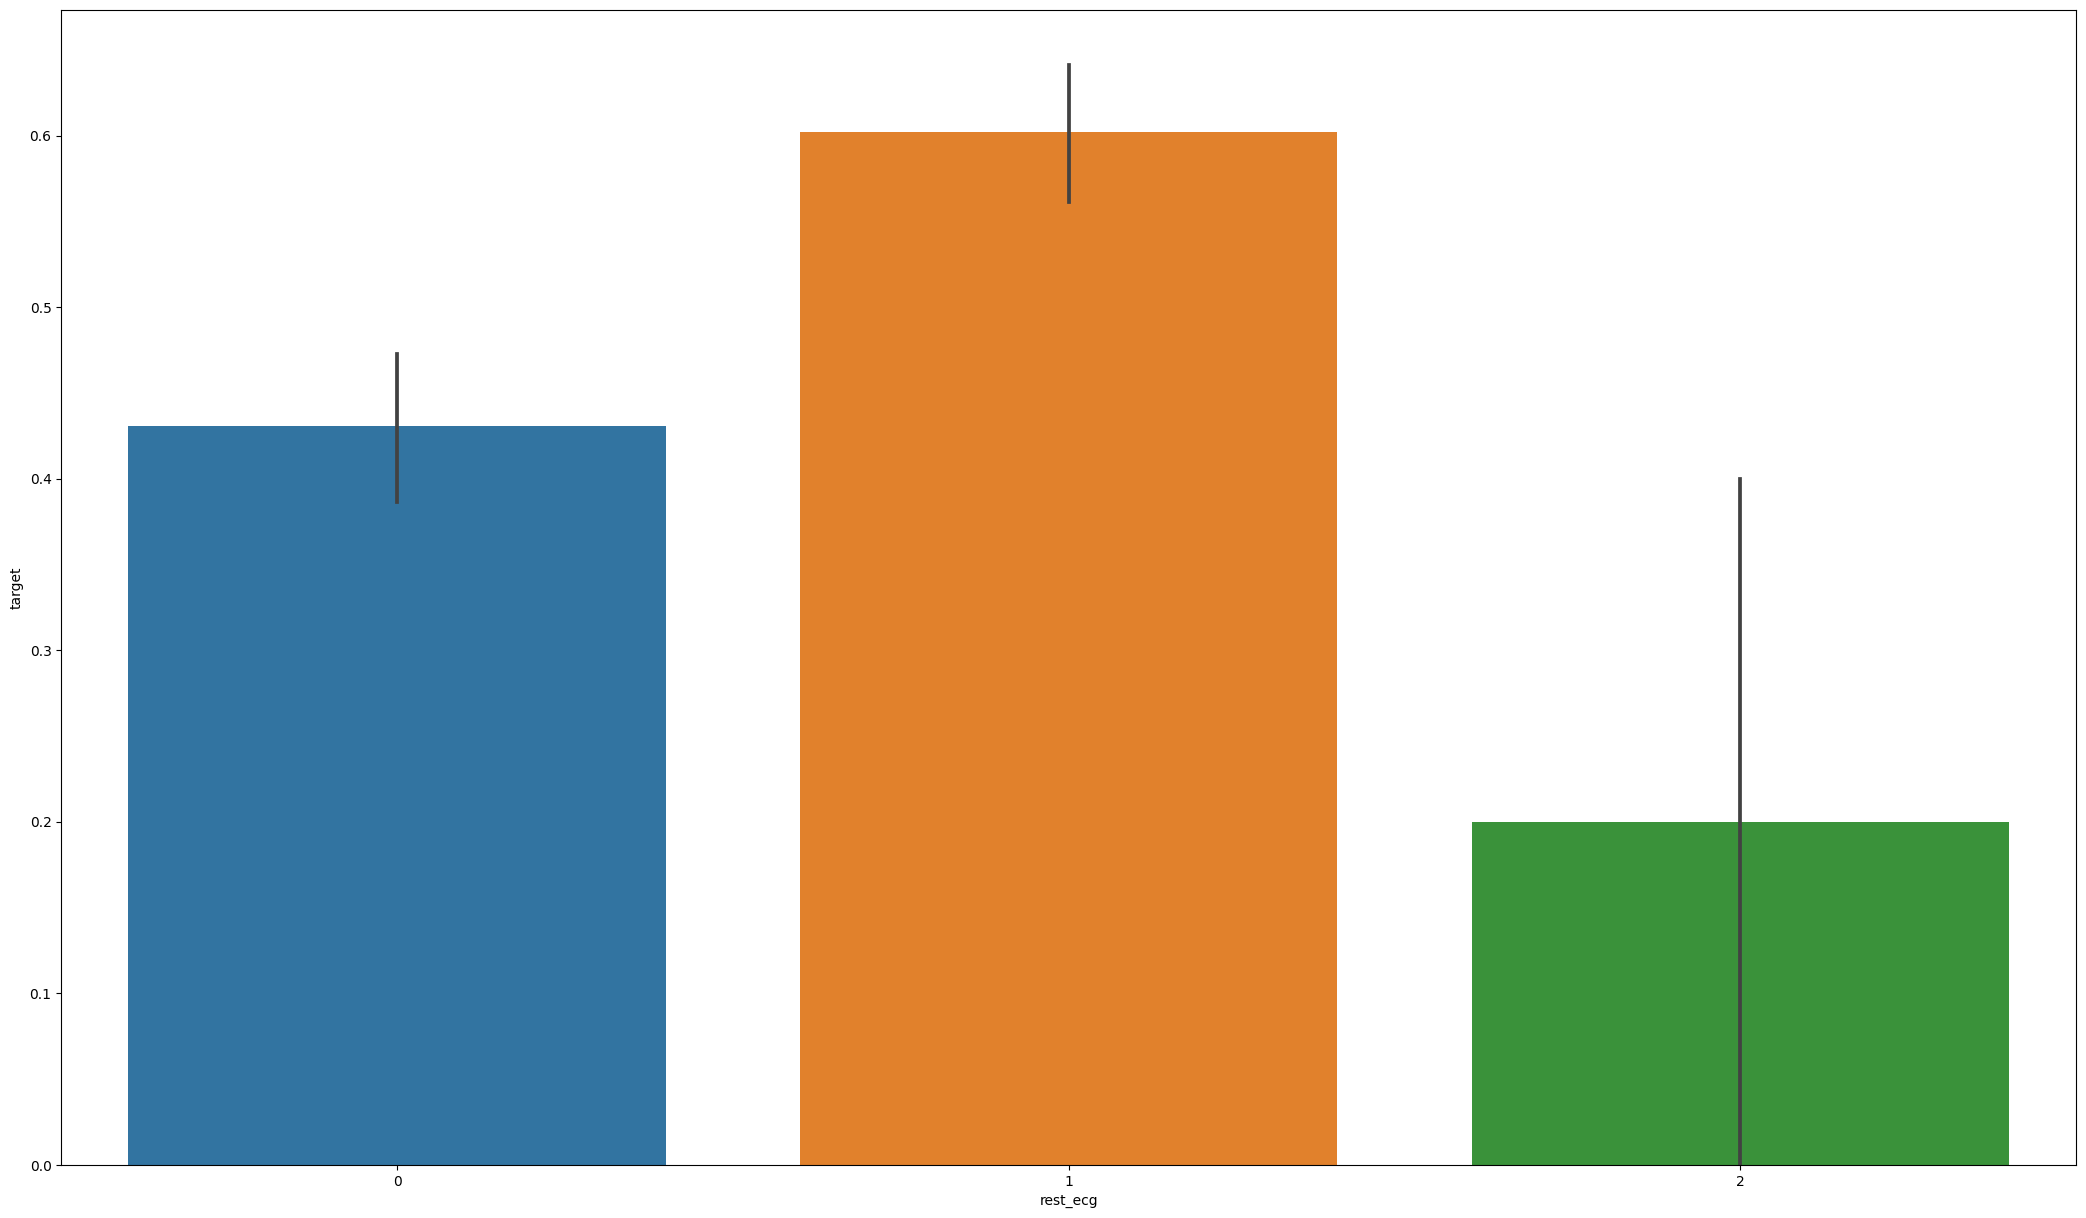

In [29]:
plt.figure(figsize=(26, 15))
sns.barplot(x=heart_data["rest_ecg"],y=y)

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'


#Analysing Exercise induced angina (1 = yes; 0 = no)

In [30]:
heart_data['exercise_induced_angina'].unique()

array([0, 1])

<Axes: xlabel='exercise_induced_angina', ylabel='target'>

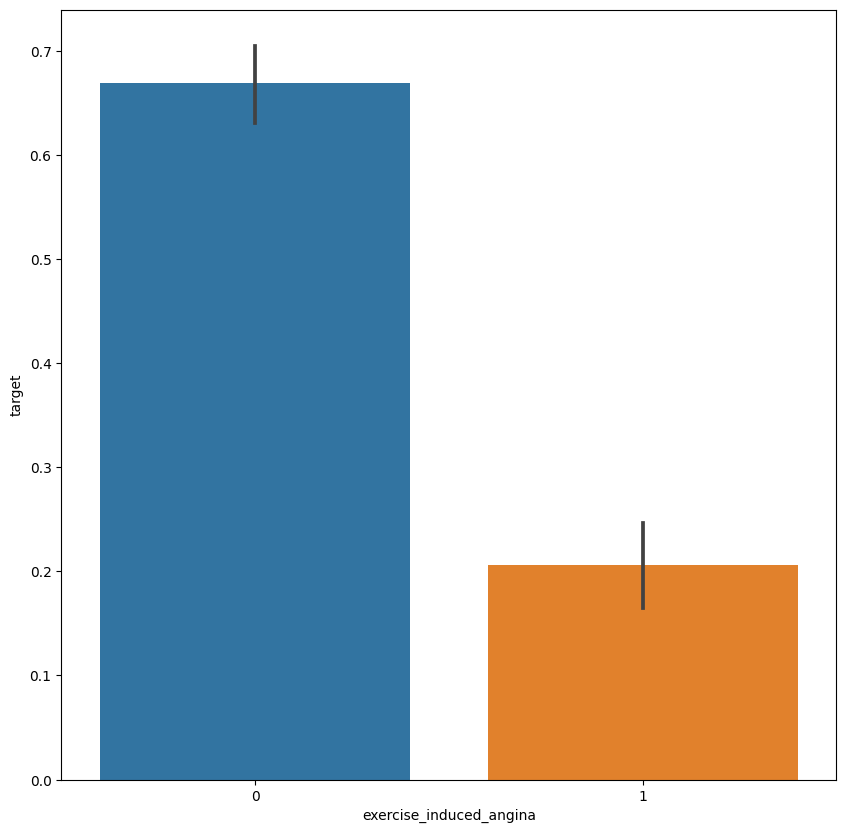

In [31]:
plt.figure(figsize=(10, 10))
sns.barplot(x=heart_data["exercise_induced_angina"],y=y)

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [32]:
heart_data["st_slope"].unique()

array([2, 0, 1])

<Axes: xlabel='st_slope', ylabel='target'>

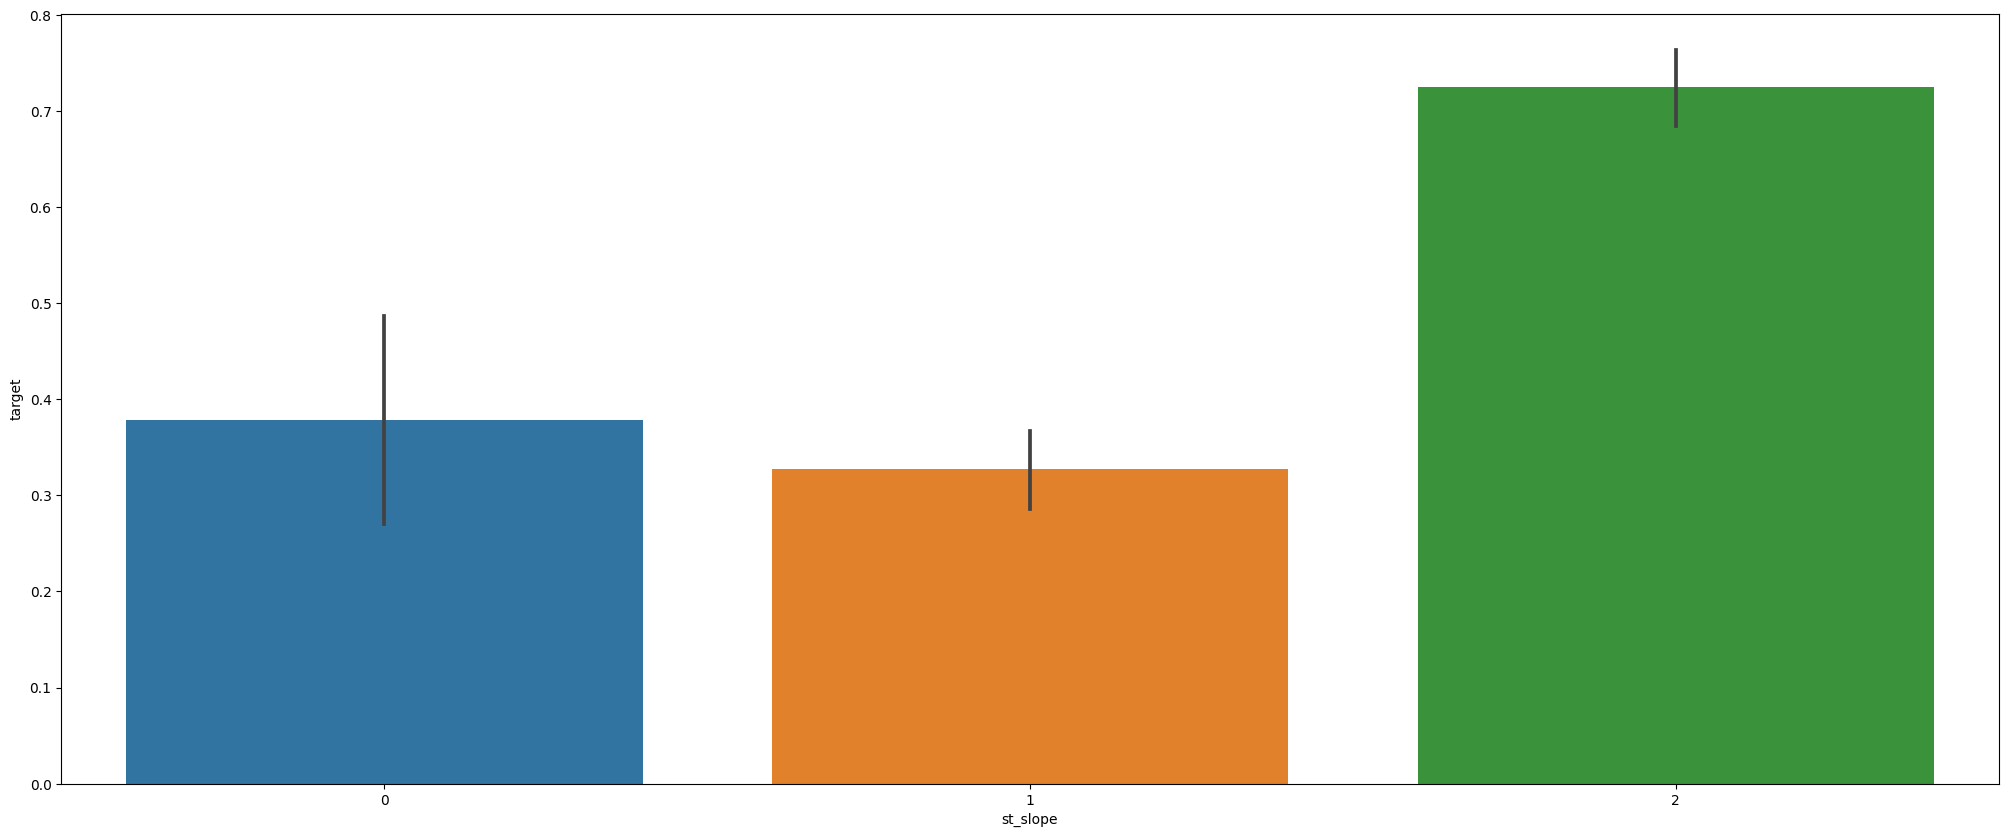

In [33]:
plt.figure(figsize=(25, 10))
sns.barplot(x=heart_data["st_slope"],y=y)

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [34]:
heart_data["num_major_vessels"].unique()

array([2, 0, 1, 3, 4])

### count num_major vessels

<Axes: xlabel='num_major_vessels', ylabel='count'>

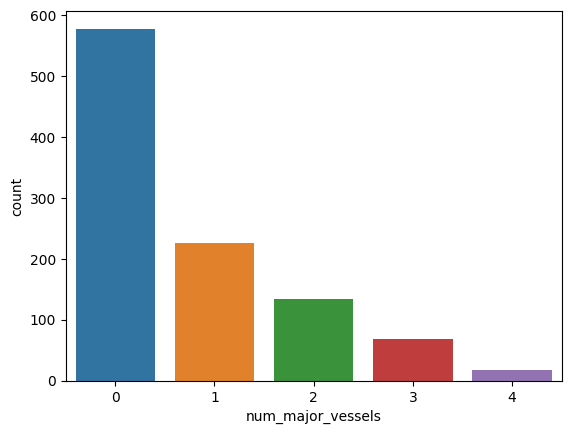

In [38]:
sns.countplot(x=heart_data["num_major_vessels"])

### comparing with target

<Axes: xlabel='num_major_vessels', ylabel='target'>

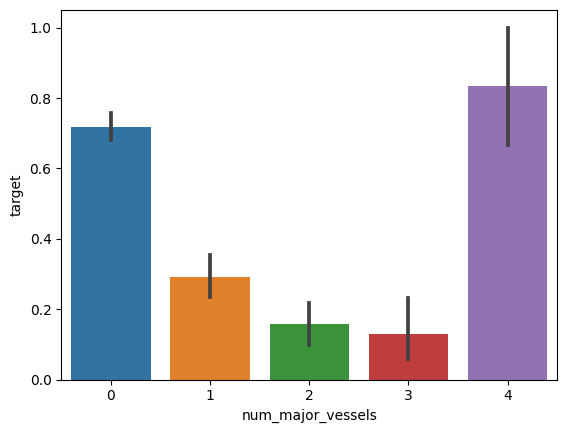

In [39]:
sns.barplot(x=heart_data["num_major_vessels"],y=y)

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [40]:
heart_data["thalassemia"].unique()

array([3, 2, 1, 0])

### plotting the thalassemia distribution (0,1,2,3)

<Axes: xlabel='thalassemia', ylabel='Density'>

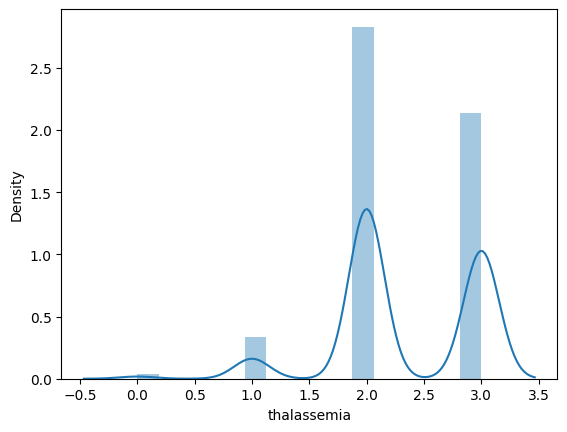

In [41]:
sns.distplot(heart_data["thalassemia"])

### comparing with target

<Axes: xlabel='thalassemia', ylabel='target'>

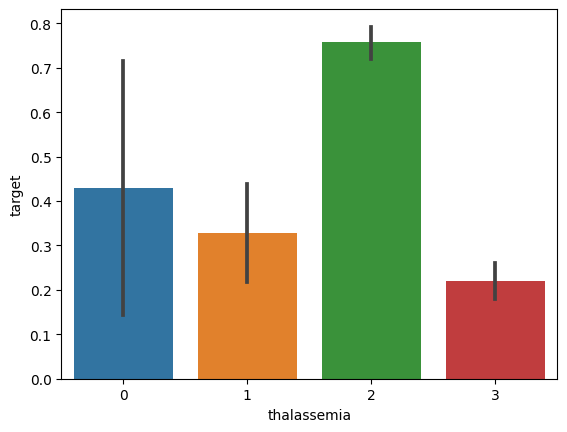

In [42]:
sns.barplot(x=heart_data["thalassemia"],y=y)

# thalassemia and cholesterol scatterplot

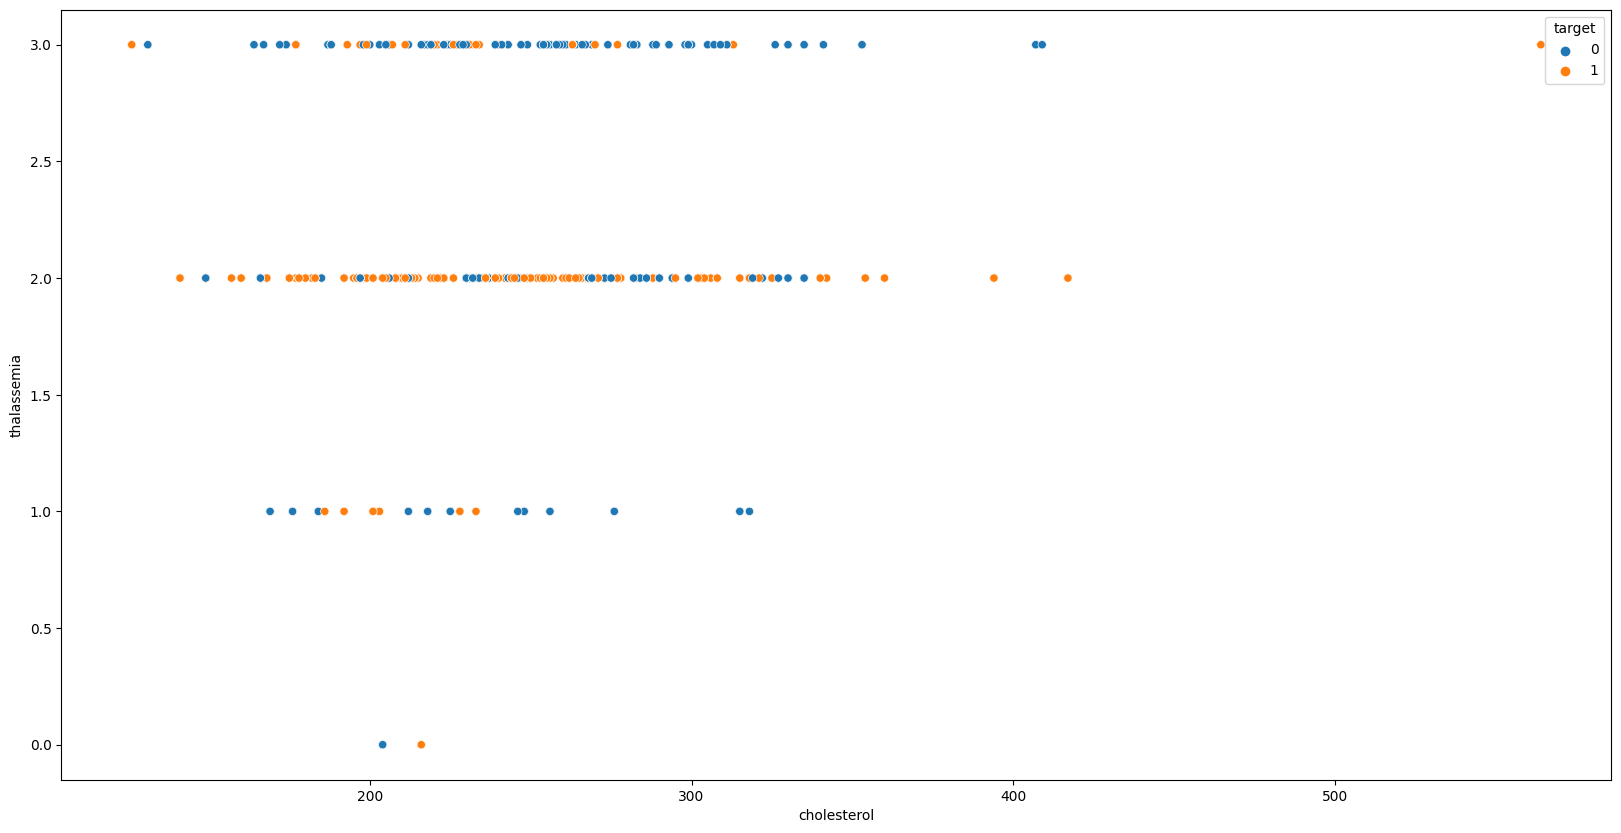

In [43]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=heart_data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

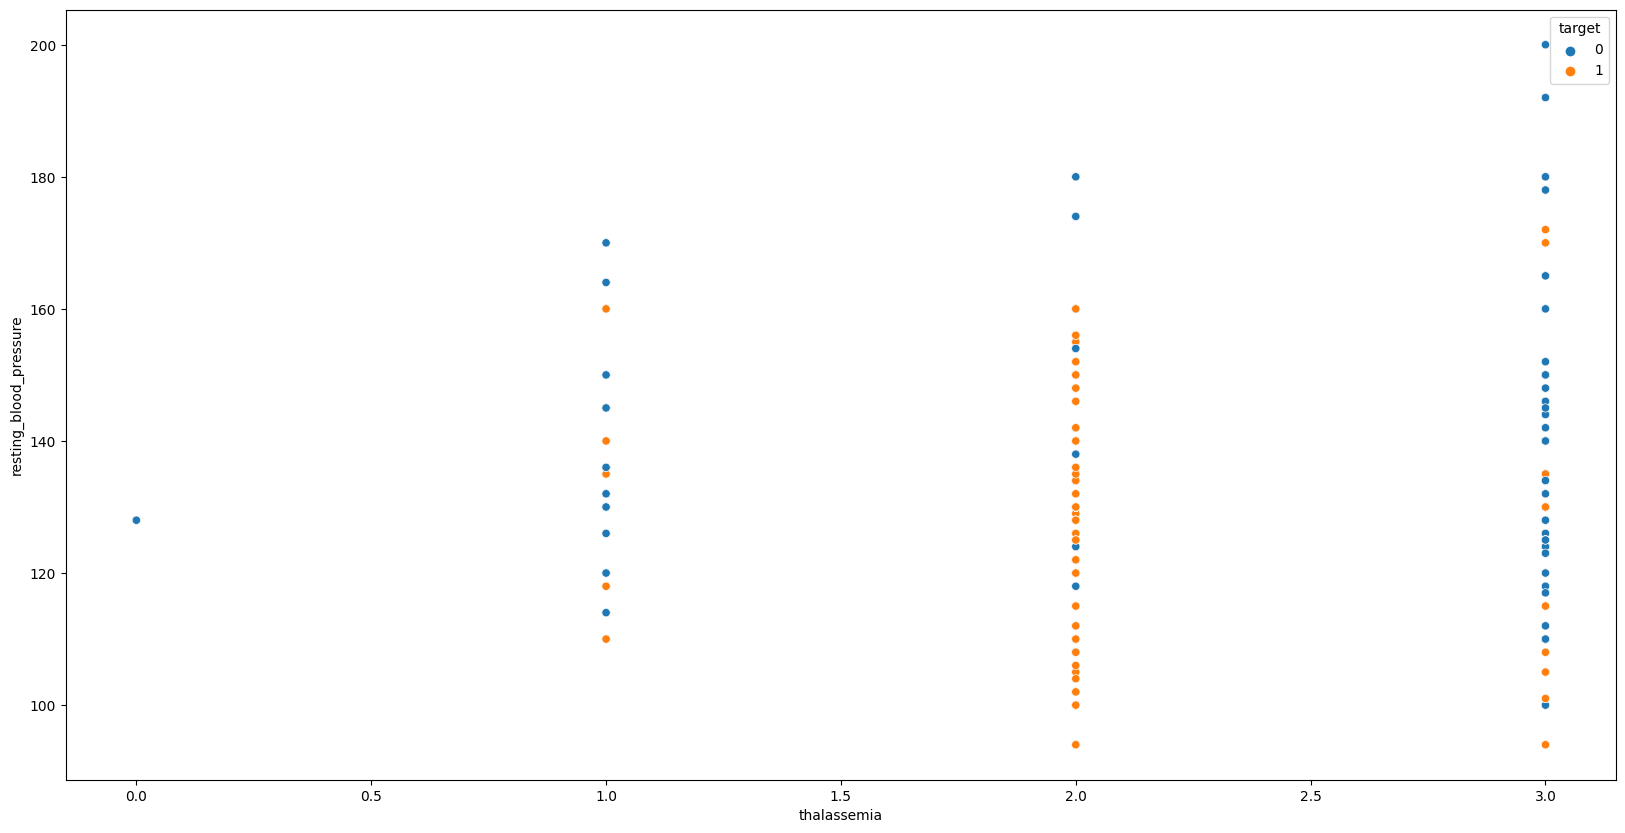

In [44]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=heart_data,hue='target')
plt.show()

## Health rate vs age

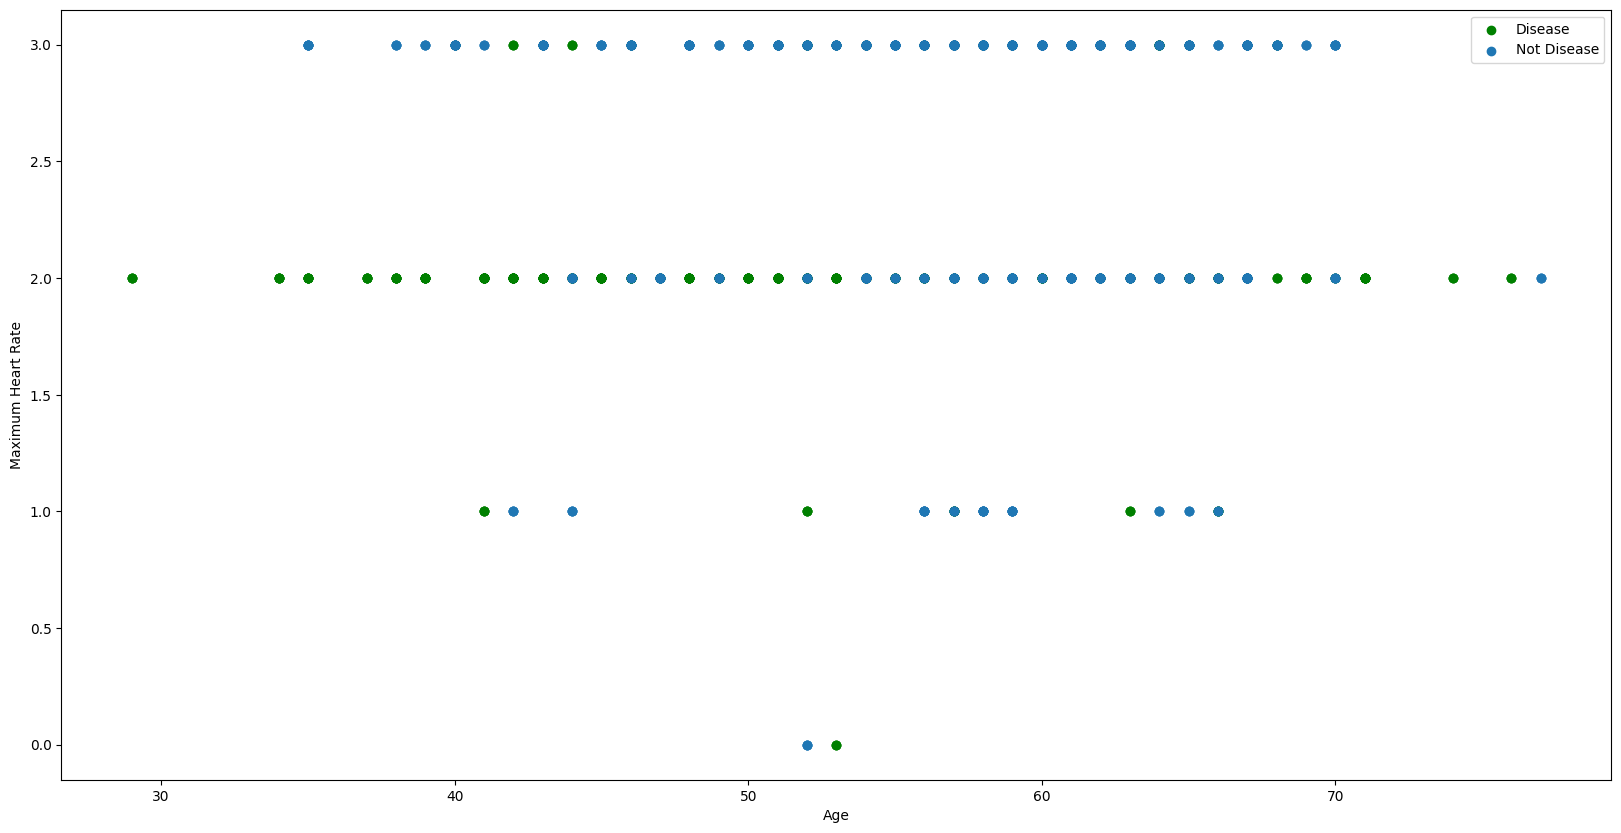

In [45]:
plt.figure(figsize=(20, 10))
plt.scatter(x=heart_data.age[heart_data.target==1], y=heart_data.thalassemia[(heart_data.target==1)], c="green")
plt.scatter(x=heart_data.age[heart_data.target==0], y=heart_data.thalassemia[(heart_data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables (e.g. height and weight)

In [46]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

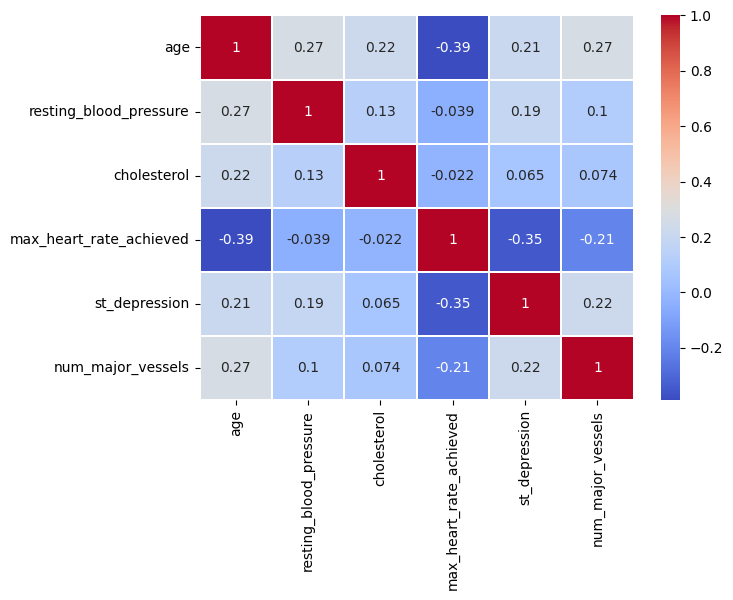

In [47]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = heart_data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [48]:
df_corr = heart_data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


# Splitting the dataset to Train and Test

In [51]:
from sklearn.model_selection import train_test_split

predictors = heart_data.drop("target",axis=1)
target = heart_data["target"]

print(predictors)

      age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0      52    1                0                     125          212   
1      53    1                0                     140          203   
2      70    1                0                     145          174   
3      61    1                0                     148          203   
4      62    0                0                     138          294   
...   ...  ...              ...                     ...          ...   
1020   59    1                1                     140          221   
1021   60    1                0                     125          258   
1022   47    1                0                     110          275   
1023   50    0                0                     110          254   
1024   54    1                0                     120          188   

      fasting_blood_sugar  rest_ecg  max_heart_rate_achieved  \
0                       0         1                      168   
1      

In [52]:
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Splitting the data into Training data & Test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=2)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

In [53]:
predictors.shape

(1025, 13)

In [50]:
X_train.shape

(820, 13)

In [57]:
X_test.shape

(205, 13)

In [56]:
Y_train.shape

(820,)

In [55]:
Y_test.shape

(205,)

## importing Accuracy score

In [54]:
from sklearn.metrics import accuracy_score

# Logistic regression

In [397]:
from sklearn.linear_model import LogisticRegression
logReg_model = LogisticRegression()
logReg_model.fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logReg_model.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logReg_model.score(X_test, Y_test)))

Training set score: 0.862
Test set score: 0.863


In [398]:
# accuracy on training data
X_train_prediction_lr = logReg_model.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction, Y_train)

In [399]:
print('Accuracy on Training data : ',training_data_accuracy_lr)

Accuracy on Training data :  0.8621951219512195


In [400]:
# accuracy on test data
X_test_prediction_lr = logReg_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)

In [401]:
print('Accuracy on Test data : ', test_data_accuracy_lr)

Accuracy on Test data :  0.8634146341463415


Building a Predictive System

In [402]:
# input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logReg_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [403]:
score_lr = round(accuracy_score(X_test_prediction_lr, Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


# Confusion Matrix

In [404]:
from sklearn.metrics import confusion_matrix

In [405]:
matrix= confusion_matrix(Y_test, X_test_prediction_lr)

In [406]:
# Extract TP, FP, FN, TN
TP = matrix[1, 1]
FP = matrix[0, 1]
FN = matrix[1, 0]
TN = matrix[0, 0]

print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Negative (TN):", TN)

True Positive (TP): 100
False Positive (FP): 21
False Negative (FN): 7
True Negative (TN): 77


<Axes: >

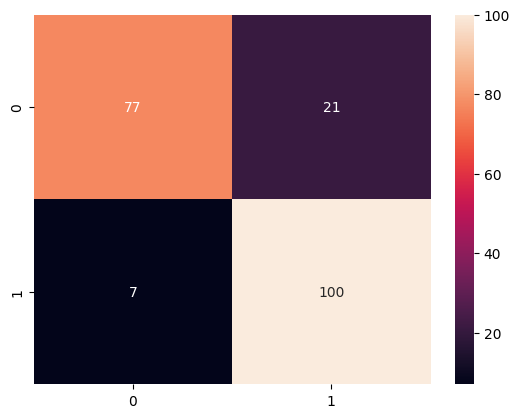

In [75]:
sns.heatmap(matrix,annot = True, fmt = "d")

fmt = d is format = default

# precision Score

In [76]:
from sklearn.metrics import precision_score

In [311]:
precision = precision_score(Y_test, X_test_prediction_lr)

In [78]:
print("Precision: ",precision)

Precision:  0.8264462809917356


## Recall

In [79]:
from sklearn.metrics import recall_score

In [312]:
recall = recall_score(Y_test, X_test_prediction_lr)

In [81]:
print("Recall is: ",recall)

Recall is:  0.9345794392523364


# F-Score

balance of precision and recall score

In [82]:
print((2*precision*recall)/(precision+recall))

0.8771929824561404


In [83]:
#let us save TP, TN, FP, FN
# TN=CM.iloc[0,0]
# FP=CM.iloc[0,1]
# FN=CM.iloc[1,0]
# TP=CM.iloc[1,1]
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]

## false negative rate of the model

In [84]:
fnr = FN * 100 / (FN + TP)
fnr

6.542056074766355

# Random Forest

In [113]:
# Now you can proceed with your RandomForestClassifier code
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf_classifier.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf_classifier.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Now, let us prune the depth of trees and check the accuracy.

In [114]:
rf_classifier_model = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf_classifier_model.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf_classifier_model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf_classifier_model.score(X_test, Y_test)))

Accuracy on training set: 0.885
Accuracy on test set: 0.902


In [313]:
# accuracy on training data
X_train_prediction_rf = rf_classifier_model.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction, Y_train)

In [315]:
print('Accuracy on Training data : ',training_data_accuracy_rf)

Accuracy on Training data :  0.8621951219512195


In [316]:
# accuracy on test data
X_test_prediction_rf = rf_classifier_model.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, Y_test)

In [317]:
print('Accuracy on Test data : ', test_data_accuracy_rf)

Accuracy on Test data :  0.8536585365853658


Building a Predictive System using Random Forest Classifier

In [318]:
# input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_classifier_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [321]:
score_rf = round(accuracy_score(X_test_prediction_rf, Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_rf)+" %")

The accuracy score achieved using Logistic Regression is: 90.24 %


In [109]:
max_accuracy = 0

for x in range(2000):
    rf_classifier_model = RandomForestClassifier(random_state=x)
    rf_classifier_model.fit(X_train,Y_train)
    X_test_prediction_rf = rf_classifier_model.predict(X_test)
    current_accuracy = round(accuracy_score(X_test_prediction_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

# rf_classifier_model = RandomForestClassifier(random_state=best_x)
# rf_classifier_model.fit(X_train,Y_train)
# X_test_prediction = rf_classifier_model.predict(X_test)

100.0
0


In [322]:
score_rf = round(accuracy_score(X_test_prediction_rf, Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_rf)+" %")

The accuracy score achieved using Logistic Regression is: 90.24 %


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-F-score: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [122]:
from sklearn.metrics import confusion_matrix

In [323]:
matrix= confusion_matrix(Y_test, X_test_prediction_rf)

<Axes: >

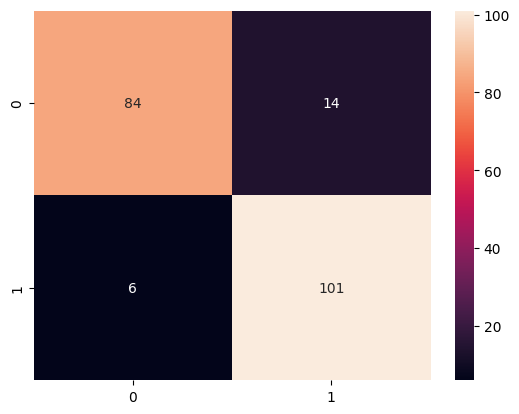

In [324]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [125]:
from sklearn.metrics import precision_score

In [325]:
precision = precision_score(Y_test, X_test_prediction_rf)

In [327]:
print("Precision: ",precision)

Precision:  0.8782608695652174


# recall

In [128]:
from sklearn.metrics import recall_score

In [328]:
recall = recall_score(Y_test, X_test_prediction_rf)

In [329]:
print("Recall is: ",recall)

Recall is:  0.9439252336448598


# F score

In [131]:
print((2*precision*recall)/(precision+recall))

0.9099099099099099


In [132]:
#let us save TP, TN, FP, FN
# TN=CM.iloc[0,0]
# FP=CM.iloc[0,1]
# FN=CM.iloc[1,0]
# TP=CM.iloc[1,1]
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]

false negative rate of the model

In [133]:
fnr = FN * 100 / (FN + TP)
fnr

5.607476635514018

# Naive Bayes

In [292]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train,Y_train)

print("Accuracy on training set: {:.3f}".format(nb_model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(nb_model.score(X_test, Y_test)))

Accuracy on training set: 0.821
Accuracy on test set: 0.854


In [331]:
# accuracy on training data
X_train_prediction_nb = nb_model.predict(X_train)
training_data_accuracy_nb = accuracy_score(X_train_prediction_nb, Y_train)

In [332]:
print('Accuracy on Training data : ',training_data_accuracy_nb)

Accuracy on Training data :  0.8207317073170731


In [334]:
# accuracy on test data
X_test_prediction_nb = nb_model.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction_nb, Y_test)

In [335]:
print('Accuracy on Test data : ', test_data_accuracy_nb)

Accuracy on Test data :  0.8536585365853658


Building a Predictive System

In [336]:
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
# input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = nb_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [337]:
score_nb = round(accuracy_score(X_test_prediction_nb, Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_nb)+" %")

The accuracy score achieved using Logistic Regression is: 85.37 %


In [338]:
X_test_prediction_nb.shape

(205,)

## confusion matrix of Naive Bayes

In [149]:
from sklearn.metrics import confusion_matrix

In [339]:
matrix= confusion_matrix(Y_test, X_test_prediction_nb)

<Axes: >

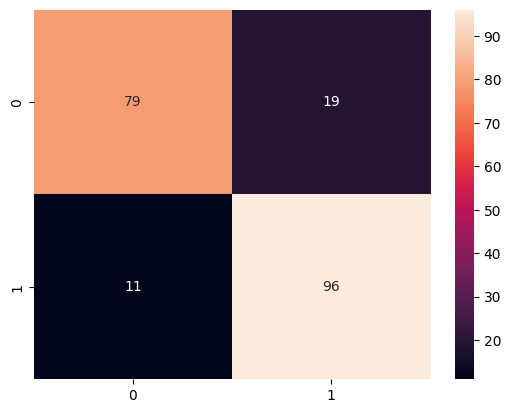

In [151]:
sns.heatmap(matrix,annot = True, fmt = "d")

## precision score

In [152]:
from sklearn.metrics import precision_score

In [340]:
precision = precision_score(Y_test, X_test_prediction_nb)

In [342]:
print("Precision: ",precision)

Precision:  0.8347826086956521


## recall

In [155]:
from sklearn.metrics import recall_score

In [341]:
recall = recall_score(Y_test, X_test_prediction_nb)

In [343]:
print("Recall is: ",recall)

Recall is:  0.897196261682243


## f score

In [158]:
print((2*precision*recall)/(precision+recall))

0.8648648648648648


In [344]:
CM = pd.crosstab(Y_test, X_test_prediction_nb)
CM

col_0,0,1
target,,
0,79,19
1,11,96


In [162]:
#let us save TP, TN, FP, FN
# TN=CM.iloc[0,0]
# FP=CM.iloc[0,1]
# FN=CM.iloc[1,0]
# TP=CM.iloc[1,1]
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]

## false negative rate of the model

In [163]:
fnr = FN*100/(FN+TP)
fnr

10.280373831775702

# KNN(K Nearest Neighbors)

In [167]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,Y_train)

print("Accuracy on training set: {:.3f}".format(knn_model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(knn_model.score(X_test, Y_test)))

Accuracy on training set: 0.795
Accuracy on test set: 0.722


In [345]:
# accuracy on training data
X_train_prediction_knn = knn_model.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction_knn, Y_train)

In [346]:
print('Accuracy on Training data : ',training_data_accuracy_knn)

Accuracy on Training data :  0.9439024390243902


In [349]:
# accuracy on test data
X_test_prediction_knn = knn_model.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_test_prediction_knn, Y_test)

In [350]:
print('Accuracy on Test data : ', test_data_accuracy_knn)

Accuracy on Test data :  0.8195121951219512


### Building a Predictive System

In [351]:
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
# input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn_model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


In [352]:
score_knn = round(accuracy_score(X_test_prediction_knn, Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_knn)+" %")

The accuracy score achieved using Logistic Regression is: 81.95 %


### Confusion matrix

In [175]:
from sklearn.metrics import confusion_matrix

In [353]:
matrix= confusion_matrix(Y_test, X_test_prediction_knn)

<Axes: >

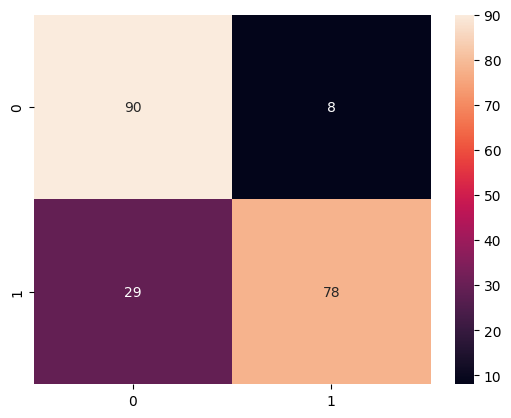

In [355]:
sns.heatmap(matrix,annot = True, fmt = "d")

# precision score

In [358]:
from sklearn.metrics import precision_score

In [354]:
precision = precision_score(Y_test, X_test_prediction_knn)

In [357]:
print("Precision: ",precision)

Precision:  0.9069767441860465


## recall

In [359]:
from sklearn.metrics import recall_score

In [360]:
recall = recall_score(Y_test, X_test_prediction_knn)

In [361]:
print("Recall is: ",recall)

Recall is:  0.7289719626168224


# f score

In [183]:
print((2*precision*recall)/(precision+recall))

0.732394366197183


In [362]:
CM = pd.crosstab(Y_test, X_test_prediction_knn)
CM

col_0,0,1
target,,
0,90,8
1,29,78


In [363]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [364]:
fnr = FN*100/(FN+TP)
fnr

27.102803738317757

In [188]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of odd k values
k_values = list(range(1, 21, 2))  # Example: Odd values from 1 to 20

# Perform cross-validation for each k value
mean_cv_scores = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_classifier, X_train, Y_train, cv=5)  # 5-fold cross-validation
    mean_cv_scores.append(np.mean(cv_scores))

# Find the k value with the highest mean cross-validated score
best_k = k_values[np.argmax(mean_cv_scores)]

print("Best k value:", best_k)


Best k value: 1


## for neighbors = 4

In [215]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,Y_train)

print("Accuracy on training set: {:.3f}".format(knn_model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(knn_model.score(X_test, Y_test)))

Accuracy on training set: 0.944
Accuracy on test set: 0.820


In [365]:
# accuracy on training data
X_train_prediction_kn = knn_model.predict(X_train)
training_data_accuracy_kn = accuracy_score(X_train_prediction_kn, Y_train)

In [366]:
print('Accuracy on Training data : ',training_data_accuracy_kn)

Accuracy on Training data :  0.9439024390243902


In [367]:
# accuracy on test data
X_test_prediction_kn = knn_model.predict(X_test)
test_data_accuracy_kn = accuracy_score(X_test_prediction_kn, Y_test)

In [368]:
print('Accuracy on Test data : ', test_data_accuracy_kn)

Accuracy on Test data :  0.8195121951219512


In [370]:
score_kn = round(accuracy_score(X_test_prediction_kn, Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_kn)+" %")

The accuracy score achieved using Logistic Regression is: 81.95 %


## Confusion Matrix

In [221]:
from sklearn.metrics import confusion_matrix

In [371]:
matrix= confusion_matrix(Y_test, X_test_prediction_kn)

<Axes: >

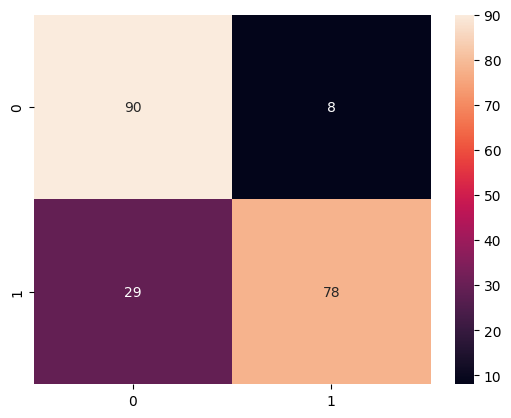

In [372]:
sns.heatmap(matrix,annot = True, fmt = "d")

## precision score

In [224]:
from sklearn.metrics import precision_score

In [373]:
precision = precision_score(Y_test, X_test_prediction_kn)

In [374]:
print("Precision: ",precision)

Precision:  0.9069767441860465


## recall

In [227]:
from sklearn.metrics import recall_score

In [375]:
recall = recall_score(Y_test, X_test_prediction_kn)

In [376]:
print("Recall is: ",recall)

Recall is:  0.7289719626168224


# f score

In [230]:
print((2*precision*recall)/(precision+recall))

0.8082901554404145


In [377]:
CM = pd.crosstab(Y_test, X_test_prediction_kn)
CM

col_0,0,1
target,,
0,90,8
1,29,78


In [378]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [379]:
fnr = FN*100/(FN+TP)
fnr

27.102803738317757

# Decision Tree

In [254]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [258]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=10, max_depth=3)
decision_tree_classifier.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(decision_tree_classifier.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree_classifier.score(X_test, Y_test)))

Accuracy on training set: 0.848
Accuracy on test set: 0.844


In [257]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

100.0
0


In [380]:
# accuracy on training data
X_train_prediction_dt = decision_tree_classifier.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

In [381]:
print('Accuracy on Training data : ',training_data_accuracy_dt)

Accuracy on Training data :  0.8475609756097561


In [382]:
# accuracy on test data
X_test_prediction_dt = decision_tree_classifier.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

In [383]:
print('Accuracy on Test data : ', test_data_accuracy_dt)

Accuracy on Test data :  0.8439024390243902


Building a Predictive System

In [384]:
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)
# input_data = (53,1,0,140,203,1,0,155,1,3.1,0,0,3)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = decision_tree_classifier.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


# Discision Tree Visualization

In [264]:
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [265]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=feature_name,
                         class_names=target_name,
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [266]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

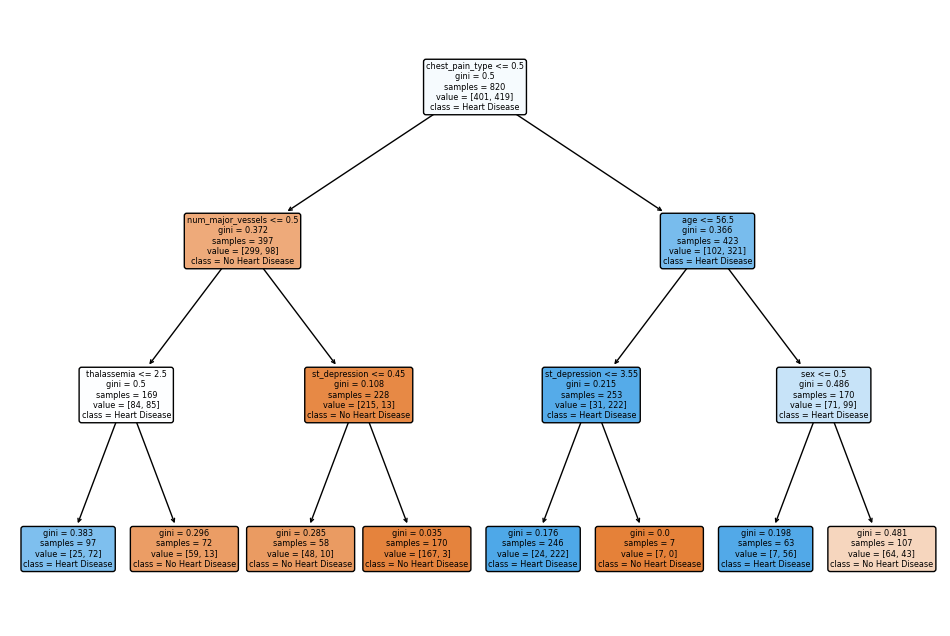

In [268]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming clf is your trained DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=10, max_depth=3)
clf.fit(X_train, Y_train)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=["No Heart Disease", "Heart Disease"], filled=True, rounded=True)
plt.show()


In [385]:
score_dt = round(accuracy_score(X_test_prediction_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 84.39 %


## Confusion Matrix

In [270]:
from sklearn.metrics import confusion_matrix

In [386]:
matrix= confusion_matrix(Y_test, X_test_prediction_dt)

<Axes: >

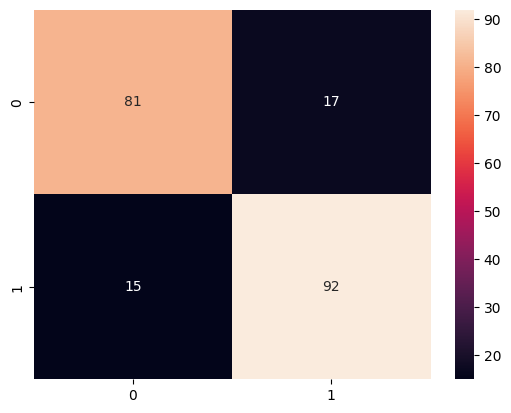

In [387]:
sns.heatmap(matrix,annot = True, fmt = "d")

## precision score

In [274]:
from sklearn.metrics import precision_score

In [388]:
precision = precision_score(Y_test, X_test_prediction_dt)

In [389]:
print("Precision: ",precision)

Precision:  0.8440366972477065


## recall

In [279]:
from sklearn.metrics import recall_score

In [390]:
recall = recall_score(Y_test, X_test_prediction_dt)

In [281]:
print("Recall is: ",recall)

Recall is:  0.8598130841121495


## f score

In [282]:
print((2*precision*recall)/(precision+recall))

0.8518518518518519


In [391]:
CM = pd.crosstab(Y_test, X_test_prediction_dt)
CM

col_0,0,1
target,,
0,81,17
1,15,92


## false negative rate

In [392]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [393]:
fnr = FN*100/(FN+TP)
fnr

14.018691588785046

# FINAL SCORE

In [394]:
scores = [score_lr,score_nb,score_kn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 81.95 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using K-Nearest Neighbors is: 81.95 %
The accuracy score achieved using Decision Tree is: 84.39 %
The accuracy score achieved using Random Forest is: 90.24 %


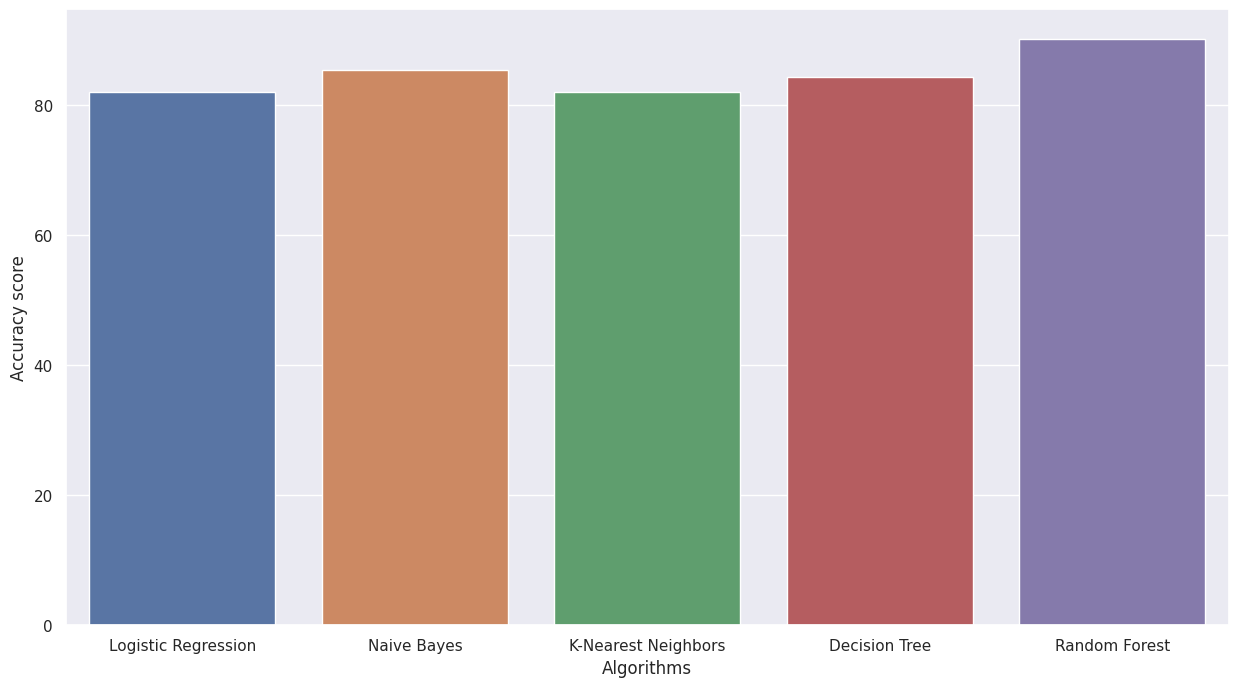

In [396]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Assuming 'algorithms' and 'scores' are lists or arrays containing your data
sns.barplot(x=algorithms, y=scores)

plt.show()


# In this project, We have used Machine Learning to predict whether a person is suffering from a heart disease or not. After importing the data, we have analysed it using plots. Then, generated categorical features and scaled other features. Then applied five Machine Learning algorithms: K Nearest Neighbors Classifier, Naive Bayes, Logistic Regression, Decision Tree Classifier and Random Forest Classifier. In the end, Random Forest achieved the highest score of 90.24%.